In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import seaborn as sns; sns.set()  # for plot styling
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy
import seaborn as sns
pd.options.display.max_columns = 999

In [2]:
user_counts = pd.read_csv("../profiles/question_counts.csv", encoding='latin1')

In [3]:
user_counts.columns

Index(['Id', 'flex', 'actionscript-3', 'svn', 'sql', 'asp.net', 'algorithm',
       'colors', 'c#', '.net',
       ...
       'meteor', 'laravel', 'firebase', 'parse.com', 'typescript', 'docker',
       'apache-spark', 'reactjs', 'spring-boot', 'ionic-framework'],
      dtype='object', length=363)

In [ ]:
fig=plt.figure(figsize=(18, 16), dpi= 100)
# clustering for k = 5 to k = 100 incerementing by 5
ks = range(5,85,5)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(user_counts.values[:, 1:])
    scores.append(-model.score(user_counts.values[:, 1:]))

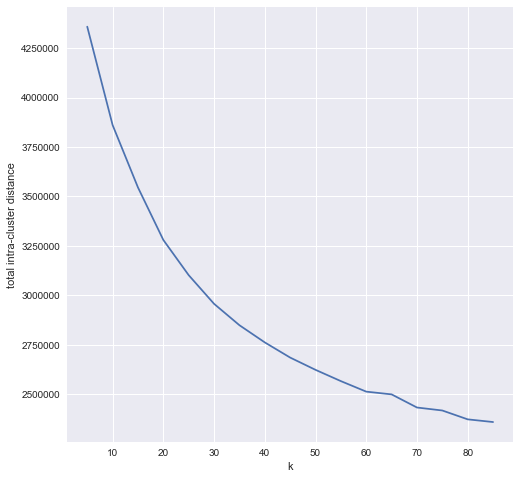

In [30]:
fig = plt.figure(figsize = (8,8))
plt.plot(np.arange(5,86,5), scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=35, init='k-means++').fit(user_counts.values[:, 1:])

In [7]:
center_points = [[round(i,2) for i in center] for center in kmeans.cluster_centers_]
centers = pd.DataFrame(data=center_points, columns = user_counts.columns[1:])
centers.head()

,flex,actionscript-3,svn,sql,asp.net,algorithm,colors,c#,.net,c++,oop,class,web-services,sql-server,deployment,visual-studio,windows,database,loops,unix,web-applications,unit-testing,testing,version-control,postgresql,stored-procedures,datatable,vbscript,html,c,data-structures,flash,video,powershell,optimization,winforms,error-handling,php,mysql,security,math,ruby,java,user-interface,xml,regex,email,forms,sharepoint,vb.net,date,indexing,authentication,logging,multithreading,animation,linux,ssh,selenium,javascript,firefox,memory,file,css,validation,printing,linq,plugins,ant,collections,osx,winapi,objective-c,function,pointers,syntax,parameters,string,binding,emacs,apache,python,tsql,sqlite,iis,ajax,performance,design-patterns,internet-explorer,unicode,orm,sockets,jsp,tomcat,exception,process,batch-file,opengl,vim,linq-to-sql,ubuntu,delphi,reporting-services,design,graphics,enums,spring,hash,haskell,types,api,encryption,parsing,ruby-on-rails,gridview,xcode,swing,silverlight,django,url,caching,wcf,datetime,networking,session,cookies,arrays,database-design,concurrency,serialization,lambda,model-view-controller,dom,pdf,import,hibernate,jquery,json,xpath,browser,excel,excel-vba,recursion,qt,casting,android,rest,soap,wpf,oracle,reflection,inheritance,http,debugging,xslt,image,templates,.htaccess,eclipse,perl,iframe,audio,sorting,assembly,bash,data-binding,ssis,methods,codeigniter,zend-framework,file-io,command-line,shell,tfs,dictionary,properties,interface,tkinter,iphone,ms-access,vba,gcc,search,activerecord,mod-rewrite,cocoa,events,time,charts,graph,object,git,paypal,scala,list,login,cakephp,pdo,ssl,https,variables,service,grails,google-analytics,svg,combobox,layout,entity-framework,scroll,wordpress,text,utf-8,random,google-chrome,rspec,makefile,generics,sed,struct,jsf,listview,drop-down-menu,plsql,build,jpa,encoding,module,post,google-app-engine,file-upload,jar,facebook,groovy,matlab,fonts,for-loop,asynchronous,arraylist,jdbc,mobile,xaml,java-ee,servlets,constructor,nginx,csv,gwt,view,tcp,curl,numpy,drupal,boost,image-processing,dll,cocoa-touch,bitmap,plot,netbeans,matrix,dependency-injection,timer,while-loop,intellij-idea,button,razor,replace,mysqli,filter,google-maps,hyperlink,if-statement,junit,spring-security,multidimensional-array,datagridview,join,extjs,select,twitter,redirect,ios,checkbox,spring-mvc,uitableview,amazon-ec2,amazon-web-services,hadoop,vector,cmd,input,open-gl,github,opencv,mvvm,azure,machine-learning,awk,dynamic,joomla,canvas,windows-phone,javafx,web,r,clojure,uiview,unity3d,magento,oauth,uiviewcontroller,matplotlib,core-data,swift,cordova,solr,heroku,maven,webview,table,oracle11g,jenkins,css3,yii,ggplot2,go,node.js,dataframe,mongodb,ipad,elasticsearch,playframework,google-apps-script,facebook-graph-api,symfony2,gradle,primefaces,doctrine2,flask,highcharts,express,knockout.js,backbone.js,mongoose,xamarin,angularjs,responsive-design,d3.js,twitter-bootstrap,pandas,ember.js,kendo-ui,meteor,laravel,firebase,parse.com,typescript,docker,apache-spark,reactjs,spring-boot,ionic-framework
0,0.00,0.00,0.00,0.74,0.11,0.00,0.00,0.14,0.07,0.02,0.00,0.00,0.01,1.35,0.00,0.06,0.01,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.06,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.03,0.06,0.01,0.00,0.01,0.03,0.00,0.04,0.02,0.00,0.00,0.01,0.07,0.02,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.05,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.20,0.00,0.01,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.01,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.0,0.00,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [12]:
# Compute the correlation matrix
corr = user_counts.corr()

In [15]:
def plot_corr(df,threshold,size=14):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    df.drop(["Id"],axis=1,inplace=True)
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    locs, labels = plt.xticks(range(len(corr.columns)), corr.columns)
    plt.setp(labels, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    # plt.show()
    plt.savefig('correlations.jpg')
    print("Saved correlations graph")
    plt.clf()

    corr[corr<threshold] = np.nan
    #corr.fillna(0,inplace=True)

    pd.DataFrame(corr).to_csv('correlation.csv',index=True)

    cov = df.cov()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(cov)
    locs, labels = plt.xticks(range(len(corr.columns)), corr.columns)
    plt.setp(labels, rotation=90)
    plt.yticks(range(len(cov.columns)), cov.columns)
    # plt.show()
    plt.savefig('covariations.jpg')
    print("Saved covariations graph")

In [ ]:
plot_corr(user_counts,0.25)

In [33]:
centers.var()

flex                   0.000513
actionscript-3         0.000864
svn                    0.003184
sql                    0.513390
asp.net               27.760168
algorithm              0.012893
colors                 0.000695
c#                    28.688263
.net                   2.745135
c++                    7.983460
oop                    0.005836
class                  0.002966
web-services           0.008436
sql-server             0.836120
deployment             0.000816
visual-studio          0.407568
windows                0.033142
database               0.041517
loops                  0.002190
unix                   0.015124
web-applications       0.001506
unit-testing           0.010543
testing                0.001165
version-control        0.000802
postgresql             0.021872
stored-procedures      0.005862
datatable              0.002220
vbscript               0.000331
html                   2.566929
c                      0.096594
                        ...    
google-a

In [41]:
user_counts.head()

,Id,flex,actionscript-3,svn,sql,asp.net,algorithm,colors,c#,.net,c++,oop,class,web-services,sql-server,deployment,visual-studio,windows,database,loops,unix,web-applications,unit-testing,testing,version-control,postgresql,stored-procedures,datatable,vbscript,html,c,data-structures,flash,video,powershell,optimization,winforms,error-handling,php,mysql,security,math,ruby,java,user-interface,xml,regex,email,forms,sharepoint,vb.net,date,indexing,authentication,logging,multithreading,animation,linux,ssh,selenium,javascript,firefox,memory,file,css,validation,printing,linq,plugins,ant,collections,osx,winapi,objective-c,function,pointers,syntax,parameters,string,binding,emacs,apache,python,tsql,sqlite,iis,ajax,performance,design-patterns,internet-explorer,unicode,orm,sockets,jsp,tomcat,exception,process,batch-file,opengl,vim,linq-to-sql,ubuntu,delphi,reporting-services,design,graphics,enums,spring,hash,haskell,types,api,encryption,parsing,ruby-on-rails,gridview,xcode,swing,silverlight,django,url,caching,wcf,datetime,networking,session,cookies,arrays,database-design,concurrency,serialization,lambda,model-view-controller,dom,pdf,import,hibernate,jquery,json,xpath,browser,excel,excel-vba,recursion,qt,casting,android,rest,soap,wpf,oracle,reflection,inheritance,http,debugging,xslt,image,templates,.htaccess,eclipse,perl,iframe,audio,sorting,assembly,bash,data-binding,ssis,methods,codeigniter,zend-framework,file-io,command-line,shell,tfs,dictionary,properties,interface,tkinter,iphone,ms-access,vba,gcc,search,activerecord,mod-rewrite,cocoa,events,time,charts,graph,object,git,paypal,scala,list,login,cakephp,pdo,ssl,https,variables,service,grails,google-analytics,svg,combobox,layout,entity-framework,scroll,wordpress,text,utf-8,random,google-chrome,rspec,makefile,generics,sed,struct,jsf,listview,drop-down-menu,plsql,build,jpa,encoding,module,post,google-app-engine,file-upload,jar,facebook,groovy,matlab,fonts,for-loop,asynchronous,arraylist,jdbc,mobile,xaml,java-ee,servlets,constructor,nginx,csv,gwt,view,tcp,curl,numpy,drupal,boost,image-processing,dll,cocoa-touch,bitmap,plot,netbeans,matrix,dependency-injection,timer,while-loop,intellij-idea,button,razor,replace,mysqli,filter,google-maps,hyperlink,if-statement,junit,spring-security,multidimensional-array,datagridview,join,extjs,select,twitter,redirect,ios,checkbox,spring-mvc,uitableview,amazon-ec2,amazon-web-services,hadoop,vector,cmd,input,open-gl,github,opencv,mvvm,azure,machine-learning,awk,dynamic,joomla,canvas,windows-phone,javafx,web,r,clojure,uiview,unity3d,magento,oauth,uiviewcontroller,matplotlib,core-data,swift,cordova,solr,heroku,maven,webview,table,oracle11g,jenkins,css3,yii,ggplot2,go,node.js,dataframe,mongodb,ipad,elasticsearch,playframework,google-apps-script,facebook-graph-api,symfony2,gradle,primefaces,doctrine2,flask,highcharts,express,knockout.js,backbone.js,mongoose,xamarin,angularjs,responsive-design,d3.js,twitter-bootstrap,pandas,ember.js,kendo-ui,meteor,laravel,firebase,parse.com,typescript,docker,apache-spark,reactjs,spring-boot,ionic-framework
0,26.0,3.0,1.0,0.0,0.0,4.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [24]:
user_questions_normalized = StandardScaler().fit_transform(user_counts)

### PCA

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(user_questions_normalized)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [40]:
targeted_users = user_counts[(user_counts['docker'] > 1)].index.tolist()
targeted_users_index = [user_counts.index.get_loc(targeted_user) for targeted_user in targeted_users]
targeted_plot_users = principalDf[principalDf.index.isin(targeted_users_index)]

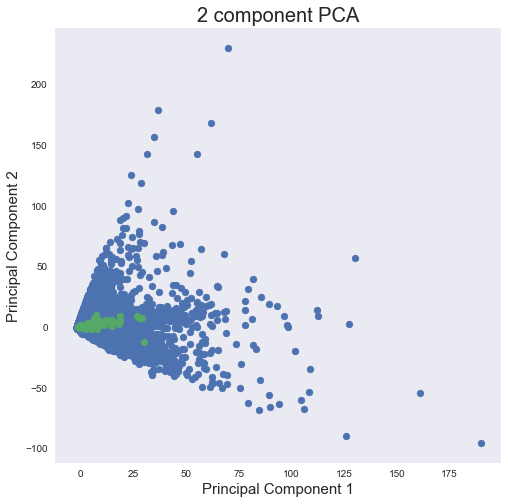

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
ax.scatter(targeted_plot_users['principal component 1'], targeted_plot_users['principal component 2'])
ax.grid()